In [1]:
import pandas as pd
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
from ipynotifyer import notifyOnComplete as nf

Populating the interactive namespace from numpy and matplotlib


In [2]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [5]:
cr = pd.read_csv('data/processed.csv',index_col=0)[['Yexp','Pexp',
                                                    'gender','income',
                                                    'city_y', 'ind', 'reg']]

cr.city_y.replace('Kyiv','Kiev', inplace=1)
cr.gender.replace('unknown', np.nan, inplace=1)

cr.dropna(how='any', inplace=1)
cr.shape

(532, 7)

In [6]:
cr.head()

,Yexp,Pexp,gender,income,city_y,ind,reg
1,0.25,4,male,960000,StPetersburg,design,StPetersburg
4,1.00,10,male,4800000,Moscow,management,Moscow
5,1.00,5,male,1440000,Moscow,design,Moscow
6,0.00,4,male,840000,Moscow,design,Moscow
7,0.00,0,male,1200000,Moscow,management,Moscow


In [7]:

# .LinearRegression

In [8]:
# create dummy (binary) variables from categorical ones
cr_d = pd.get_dummies(cr[['Yexp','Pexp','gender','ind','reg']])
y = cr['income']

In [9]:
cr_d.head(2)

,Yexp,Pexp,gender_female,gender_male,ind_design,ind_dev,ind_management,ind_other,reg_?,reg_Asia,reg_Belorus,reg_Europe,reg_ME,reg_Moscow,reg_Russia,reg_StPetersburg,reg_US,reg_Ukraine,reg_Uzbekistan
1,0.25,4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.00,10,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
mask = (y < 6000000 )* (y>1000)

/Users/casy/anaconda/lib/python2.7/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [11]:
X = cr_d[mask]
y = y[mask]

In [12]:
def NormDF(df, axis=0):
    return (df - df.mean(axis))/df.std(axis)

In [13]:
# X = NormDF(X)

In [14]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     11.24
Date:                Mon, 06 Jun 2016   Prob (F-statistic):           5.91e-25
Time:                        13:52:28   Log-Likelihood:                -7737.7
No. Observations:                 515   AIC:                         1.551e+04
Df Residuals:                     498   BIC:                         1.558e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Yexp             -1.871e+04   1.47e+04  

In [18]:
pp = pd.DataFrame({'real': y, 'predicted':results.predict(),'label': cr.ind[mask]})
pp.head(2)

,label,predicted,real
1,design,1236216.383733,960000
4,management,1950773.447849,4800000


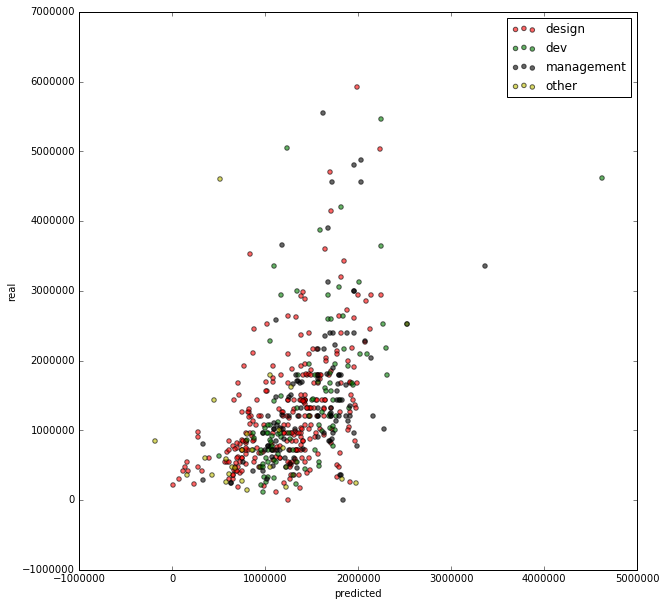

In [26]:
# pp[(pp.predicted>0)&(pp.real>0)].plot.scatter(x='predicted',y='real', loglog=1)
fig, ax = plt.subplots(figsize=(10,10))

colors = 'rgkyw'
for i, (name, g) in enumerate(pp.groupby('label')):
    g.plot.scatter(x='predicted',y='real', ax=ax, color=colors[i],label=name, alpha=.6)

In [27]:
X = cr_d[cr_d.income<10000000][['Yexp', 'Pexp', 'gender_female', 'gender_male']]
y = cr_d[cr_d.income<10000000]['income']

AttributeError: 'DataFrame' object has no attribute 'income'

In [28]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     11.24
Date:                Mon, 06 Jun 2016   Prob (F-statistic):           5.91e-25
Time:                        13:57:37   Log-Likelihood:                -7737.7
No. Observations:                 515   AIC:                         1.551e+04
Df Residuals:                     498   BIC:                         1.558e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Yexp             -1.871e+04   1.47e+04  

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logit_classifier = LogisticRegression(penalty="l1", solver='liblinear', verbose=2)
logit_classifier.fit(X=X, y=y)

logit_predictions = logit_classifier.predict_proba(pred_test)[:, 1]

ValueError: Unknown label type: array([ 1560000.,   960000.,   960000., ...,  1690000.,   660000.,
         996012.])